In [1]:
print("hwllo")

hwllo


In [ ]:
# =======================
# 💾 Save the Vectorizer for Streamlit UI
# =======================
joblib.dump(vectorizer, 'vectorizer.pkl')
print("Vectorizer saved as 'vectorizer.pkl'")

In [2]:
# =======================
# 📦 1. Import Libraries
# =======================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ML tools
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  # Or use another model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Optional: Save model
import joblib

# For display
import warnings
warnings.filterwarnings("ignore")

In [3]:
# =======================
# 📂 2. Load the Dataset
# =======================

# Replace with your file path
file_path = 'train.txt'

# Load based on format — choose one:
# If comma-separated (CSV)
df = pd.read_csv(file_path, sep=',')  # or sep='\t' if tab-separated

# If not structured, try this:
# with open(file_path, 'r') as f:
#     lines = f.readlines()
#     for line in lines[:5]:
#         print(line.strip())  # Inspect format manually


In [4]:
# =======================
# 🧹 3. Clean the Dataset
# =======================

# Preview
print("Dataset Preview:")
display(df.head())

# Drop missing values (if any)
df = df.dropna()

# Check column types
print("Data Types:")
print(df.dtypes)

# Show columns to help user select the correct target column
print("Available columns:")
print(df.columns.tolist())

# If only one column exists, try to split it into features and label
if len(df.columns) == 1:
    col = df.columns[0]
    # Try to split the single column into two: text and label
    df[['text', 'label']] = df[col].str.split(';', n=1, expand=True)
    print("Split single column into: ", df.columns.tolist())

target_column = 'label'  # Now we know the label column is 'label'
X = df.drop(target_column, axis=1)
y = df[target_column]

Dataset Preview:


,i didnt feel humiliated;sadness
0,i can go from feeling so hopeless to so damned...
1,im grabbing a minute to post i feel greedy wro...
2,i am ever feeling nostalgic about the fireplac...
3,i am feeling grouchy;anger
4,ive been feeling a little burdened lately wasn...


Data Types:
i didnt feel humiliated;sadness    object
dtype: object
Available columns:
['i didnt feel humiliated;sadness']
Split single column into:  ['i didnt feel humiliated;sadness', 'text', 'label']


In [5]:
# =======================
# 🧪 4. Split the Data
# =======================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [6]:
# =======================
# 🤖 5. Train the Model
# =======================
from sklearn.feature_extraction.text import CountVectorizer

# Convert text data to numeric features
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train['text'])
X_test_vec = vectorizer.transform(X_test['text'])

model = RandomForestClassifier()
model.fit(X_train_vec, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


✅ Accuracy: 0.8671875

📄 Classification Report:
              precision    recall  f1-score   support

       anger       0.86      0.82      0.84       450
        fear       0.87      0.80      0.83       389
         joy       0.84      0.94      0.89      1053
        love       0.82      0.73      0.77       261
     sadness       0.91      0.89      0.90       938
    surprise       0.85      0.75      0.80       109

    accuracy                           0.87      3200
   macro avg       0.86      0.82      0.84      3200
weighted avg       0.87      0.87      0.87      3200



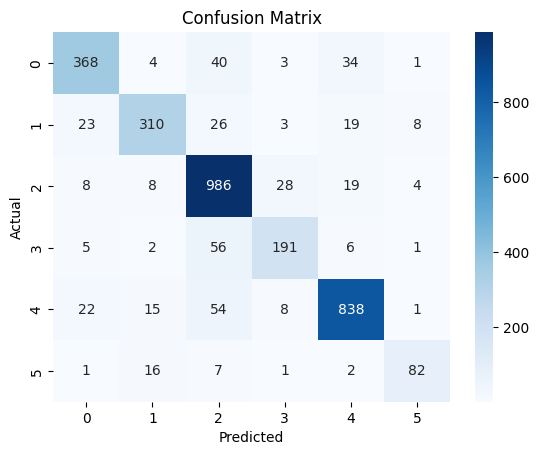

In [11]:
# =======================
# 📊 6. Evaluate the Model
# =======================
y_pred = model.predict(X_test_vec)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📄 Classification Report:")
print(classification_report(y_test, y_pred))

# Optional: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

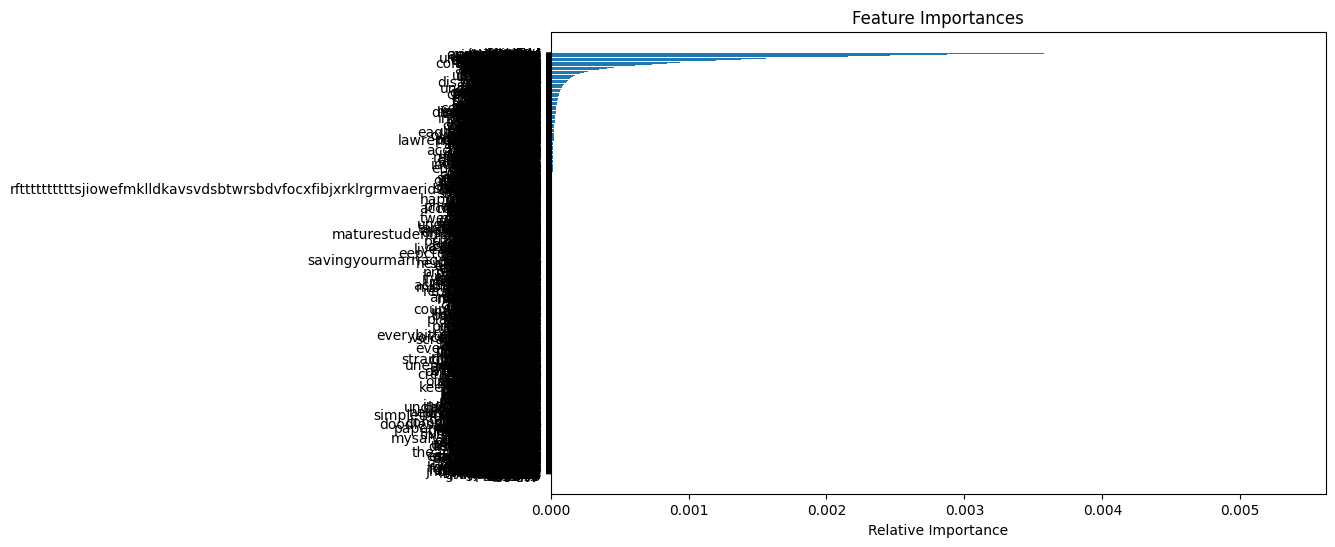

In [13]:
# =======================
# 📉 7. Feature Importance (Optional)
# =======================
# Use vectorizer feature names for text data
feature_names = vectorizer.get_feature_names_out()
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [14]:
# =======================
# 💾 8. Save the Model (Optional)
# =======================
joblib.dump(model, 'trained_model.pkl')
print("Model saved as 'trained_model.pkl'")


Model saved as 'trained_model.pkl'


In [7]:
# =======================
# 💾 Save the trained CountVectorizer for Streamlit
# =======================
import joblib
joblib.dump(vectorizer, 'vectorizer.pkl')
print("Vectorizer saved as 'vectorizer.pkl'")

Vectorizer saved as 'vectorizer.pkl'
